In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patches as mpatches
import networkx as nx

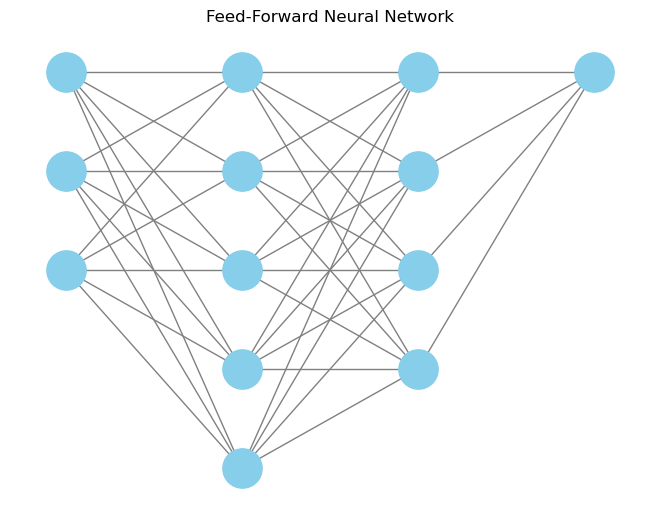

In [ ]:
def draw_ffnn(layer_sizes):
    G = nx.DiGraph()

    pos = {}
    node_count = 0
    layer_positions = []
    for i, size in enumerate(layer_sizes):
        layer = []
        for j in range(size):
            node_name = f"L{i}_N{j}"
            G.add_node(node_name)
            pos[node_name] = (i, -j)
            layer.append(node_name)
        layer_positions.append(layer)

    for l1, l2 in zip(layer_positions[:-1], layer_positions[1:]):
        for n1 in l1:
            for n2 in l2:
                G.add_edge(n1, n2)

    nx.draw(G, pos, with_labels=False, arrows=False, node_size=800,
            node_color="skyblue", edge_color="gray")
    plt.title("Feed-Forward Neural Network")
    plt.show()

draw_ffnn([3, 5, 4, 1])  


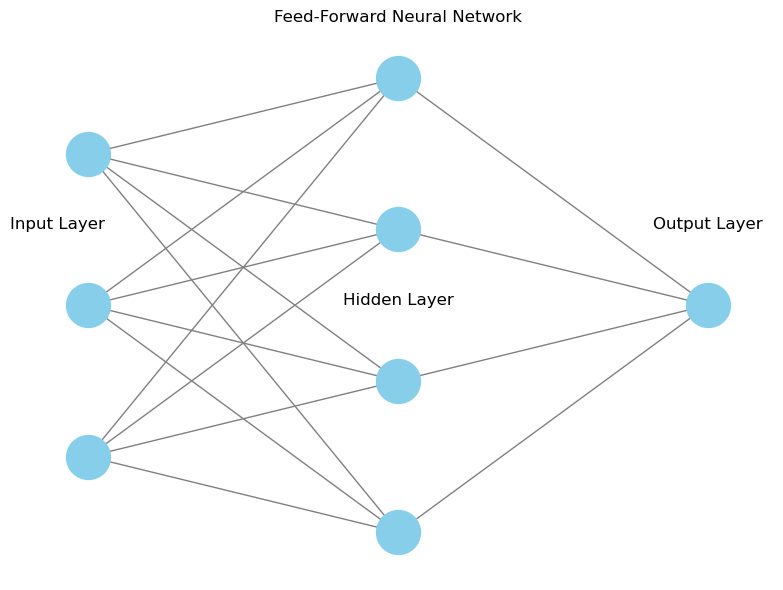

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_simple_ffnn(input_size, hidden_size, output_size):
    G = nx.DiGraph()
    pos = {}
    
    # Positionen der Neuronen festlegen
    layer_sizes = [input_size, hidden_size, output_size]
    layer_positions = []
    
    for i, size in enumerate(layer_sizes):
        layer = []
        y_offset = (size - 1) / 2
        for j in range(size):
            node_name = f"L{i}_N{j}"
            G.add_node(node_name)
            pos[node_name] = (i * 2, y_offset - j)
            layer.append(node_name)
        layer_positions.append(layer)

    # Kanten zwischen den Schichten
    for l1, l2 in zip(layer_positions[:-1], layer_positions[1:]):
        for n1 in l1:
            for n2 in l2:
                G.add_edge(n1, n2)

    fig, ax = plt.subplots(figsize=(8, 6))
    nx.draw(G, pos, with_labels=False, arrows=False, node_size=1000,
            node_color="skyblue", edge_color="gray", ax=ax)

    ax.text(-0.2, 0.5, "Input Layer", fontsize=12, horizontalalignment='center', rotation=0)
    ax.text(2.0, 0, "Hidden Layer", fontsize=12, horizontalalignment='center', rotation=0)
    ax.text(4.0, 0.5, "Output Layer", fontsize=12, horizontalalignment='center', rotation=0)

    ax.set_title("Feed-Forward Neural Network")
    ax.axis('off')
    plt.tight_layout()
    plt.show()

draw_simple_ffnn(input_size=3, hidden_size=4, output_size=1)


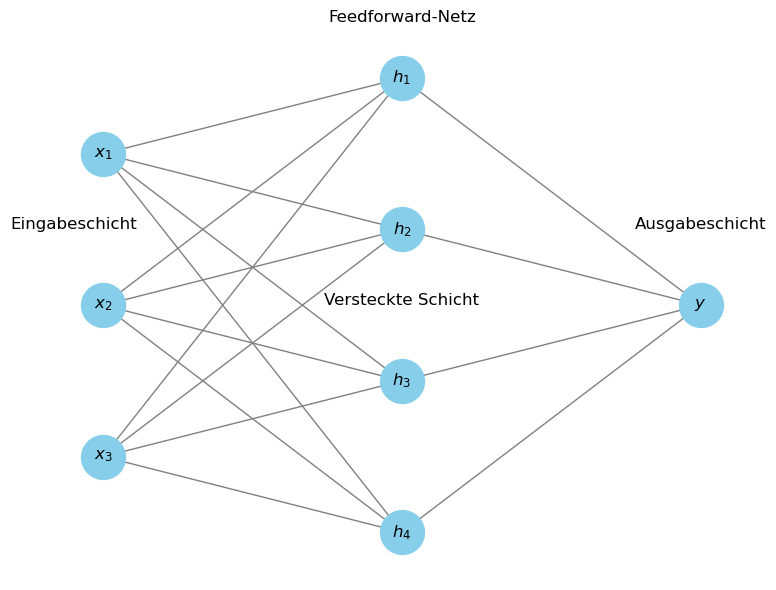

In [ ]:
import networkx as nx

def draw_simple_ffnn(input_size, hidden_size, output_size):
    G = nx.DiGraph()
    pos = {}
    labels = {}

    layer_sizes = [input_size, hidden_size, output_size]
    layer_positions = []

    for i, size in enumerate(layer_sizes):
        layer = []
        y_offset = (size - 1) / 2
        for j in range(size):
            node_name = f"L{i}_N{j}"
            G.add_node(node_name)
            pos[node_name] = (i * 2, y_offset - j)
            layer.append(node_name)

            # Beschriftungen
            if i == 0:
                labels[node_name] = f"$x_{{{j+1}}}$"
            elif i == 1:
                labels[node_name] = f"$h_{{{j+1}}}$"
            else:
                labels[node_name] = f"$y$" if output_size == 1 else f"$y_{{{j+1}}}$"

        layer_positions.append(layer)

    # Kanten zwischen den Schichten
    for l1, l2 in zip(layer_positions[:-1], layer_positions[1:]):
        for n1 in l1:
            for n2 in l2:
                G.add_edge(n1, n2)

    # Zeichnen
    fig, ax = plt.subplots(figsize=(8, 6))
    nx.draw(G, pos, with_labels=False, arrows=False, node_size=1000,
            node_color="skyblue", edge_color="gray", ax=ax)

    nx.draw_networkx_labels(G, pos, labels=labels, font_size=12, ax=ax)

    ax.text(-0.2, 0.5, "Eingabeschicht", fontsize=12, horizontalalignment='center', rotation=0)
    ax.text(2.0, 0, "Versteckte Schicht", fontsize=12, horizontalalignment='center', rotation=0)
    ax.text(4.0, 0.5, "Ausgabeschicht", fontsize=12, horizontalalignment='center', rotation=0)


    ax.set_title("Feedforward-Netz")
    ax.axis('off')
    plt.tight_layout()
    plt.show()

draw_simple_ffnn(input_size=3, hidden_size=4, output_size=1)


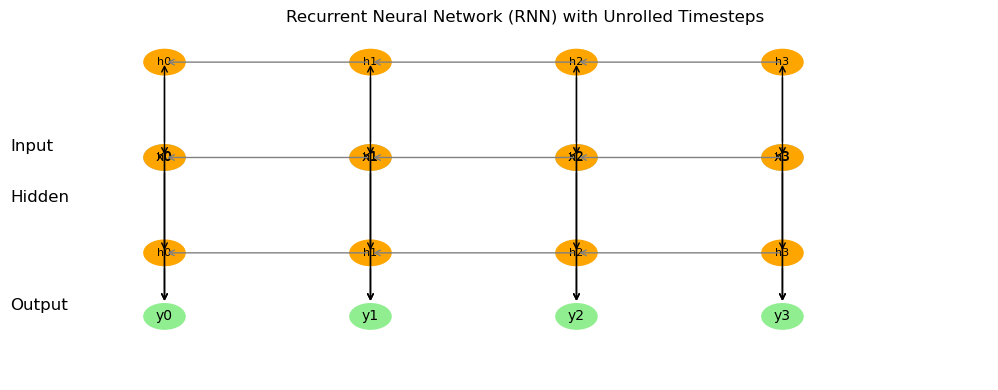

In [ ]:
def draw_simple_rnn(input_size=1, hidden_size=3, output_size=1, timesteps=4):
    fig, ax = plt.subplots(figsize=(10, 4))

    x_spacing = 2
    y_spacing = 1.5

    for t in range(timesteps):
        x = t * x_spacing
        
        ax.add_patch(patches.Circle((x, 0), 0.2, color='skyblue'))
        ax.text(x, 0, f"x{t}", ha='center', va='center', fontsize=10)

        for h in range(hidden_size):
            y = -y_spacing * (h - (hidden_size - 1) / 2)
            ax.add_patch(patches.Circle((x, y), 0.2, color='orange'))
            ax.text(x, y, f"h{t}", ha='center', va='center', fontsize=8, color='black')

            # Recurrent connection (self-loop)
            if t > 0:
                ax.annotate("",
                            xy=(x - x_spacing, y),
                            xytext=(x, y),
                            arrowprops=dict(arrowstyle="->", color='gray'))

        # Output node
        ax.add_patch(patches.Circle((x, -2.5), 0.2, color='lightgreen'))
        ax.text(x, -2.5, f"y{t}", ha='center', va='center', fontsize=10)

        # Input to hidden arrows
        for h in range(hidden_size):
            y = -y_spacing * (h - (hidden_size - 1) / 2)
            ax.annotate("",
                        xy=(x, y),
                        xytext=(x, 0.2),
                        arrowprops=dict(arrowstyle="->", color='black'))

        # Hidden to output arrows
        for h in range(hidden_size):
            y = -y_spacing * (h - (hidden_size - 1) / 2)
            ax.annotate("",
                        xy=(x, -2.3),
                        xytext=(x, y - 0.2),
                        arrowprops=dict(arrowstyle="->", color='black'))

    # Beschriftung
    ax.text(-1.5, 0.1, "Input", fontsize=12)
    ax.text(-1.5, -0.7, "Hidden", fontsize=12)
    ax.text(-1.5, -2.4, "Output", fontsize=12)

    ax.set_xlim(-1, timesteps * x_spacing)
    ax.set_ylim(-3.5, 2)
    ax.axis('off')
    ax.set_title("Recurrent Neural Network (RNN) with Unrolled Timesteps")
    plt.tight_layout()
    plt.show()

# Funktion aufrufen
draw_simple_rnn()

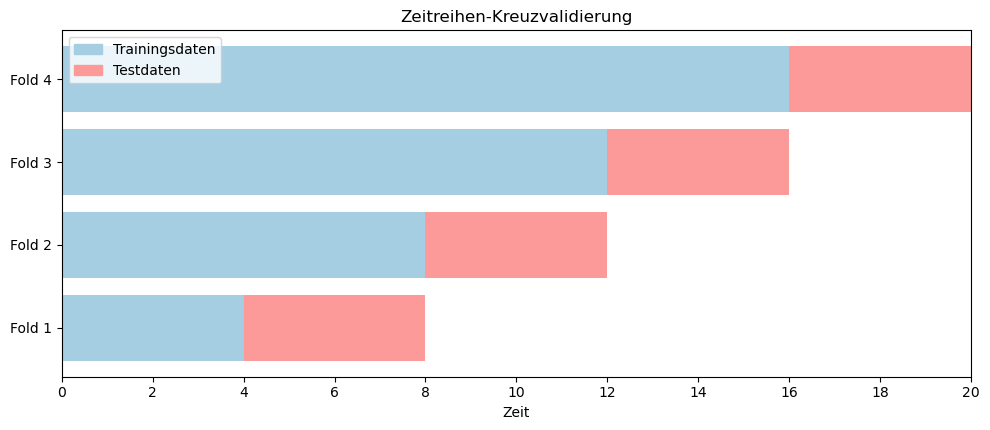

In [12]:
# Parameter
folds = 4
time_points = 20
fold_size = 4

# Farben
train_color = "#a6cee3"
val_color = "#fb9a99"

# Grafik
fig, ax = plt.subplots(figsize=(10, 2 + 0.6 * folds))

for i in range(folds):
    train_end = fold_size * (i + 1)
    val_start = train_end
    val_end = val_start + fold_size

    ax.broken_barh([(0, train_end)], (i, 0.8), facecolors=train_color)
    ax.broken_barh([(val_start, fold_size)], (i, 0.8), facecolors=val_color)

# Achsen und Titel
ax.set_yticks([i + 0.4 for i in range(folds)])
ax.set_yticklabels([f'Fold {i+1}' for i in range(folds)])
ax.set_xticks(range(0, time_points + 1, 2))
ax.set_xlim(0, time_points)
ax.set_xlabel("Zeit")
ax.set_title("Zeitreihen-Kreuzvalidierung")

# Legende
train_patch = mpatches.Patch(color=train_color, label='Trainingsdaten')
val_patch = mpatches.Patch(color=val_color, label='Testdaten')
ax.legend(handles=[train_patch, val_patch], loc="upper left")

plt.tight_layout()
plt.show()


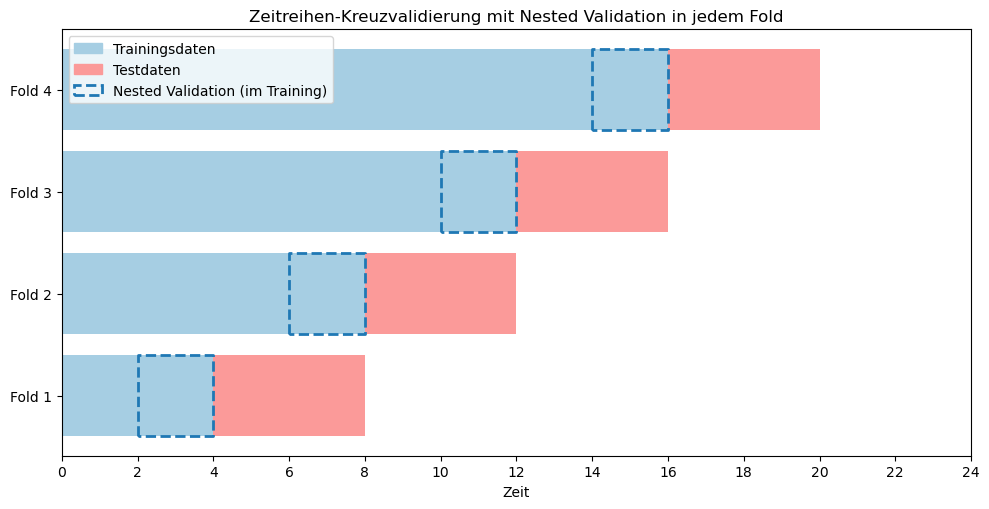

In [14]:
# Parameter
folds = 4                      # Anzahl der Folds
time_points = 24               # Gesamtanzahl an Zeitpunkten
fold_size = 4                  # Länge jedes Testsegments
nested_val_size = 2            # Größe des Nested-Validation-Bereichs

# Farben
train_color = "#a6cee3"
test_color = "#fb9a99"
nested_color = "#1f78b4"

# Plot erstellen
fig, ax = plt.subplots(figsize=(10, 2 + 0.8 * folds))

for i in range(folds):
    train_end = fold_size * (i + 1)
    test_start = train_end
    test_end = test_start + fold_size

    # Trainingsdaten
    ax.broken_barh([(0, train_end)], (i, 0.8), facecolors=train_color)

    # Testdaten
    ax.broken_barh([(test_start, fold_size)], (i, 0.8), facecolors=test_color)

    # Nested Validation im Trainingsteil (gestrichelt)
    nested_val_start = train_end - nested_val_size
    ax.broken_barh([(nested_val_start, nested_val_size)], (i, 0.8),
                   facecolors='none', edgecolors=nested_color,
                   linestyles='dashed', linewidth=2)

# Achsen und Beschriftungen
ax.set_yticks([i + 0.4 for i in range(folds)])
ax.set_yticklabels([f'Fold {i+1}' for i in range(folds)])
ax.set_xticks(range(0, time_points + 1, 2))
ax.set_xlim(0, time_points)
ax.set_xlabel("Zeit")
ax.set_title("Zeitreihen-Kreuzvalidierung mit Nested Validation in jedem Fold")

# Legende
train_patch = mpatches.Patch(color=train_color, label='Trainingsdaten')
test_patch = mpatches.Patch(color=test_color, label='Testdaten')
nested_patch = mpatches.Patch(edgecolor=nested_color, facecolor='none',
                              linestyle='dashed', linewidth=2,
                              label='Nested Validation (im Training)')
ax.legend(handles=[train_patch, test_patch, nested_patch], loc="upper left")

plt.tight_layout()

# Optional speichern
plt.savefig("zeitreihen_kreuzvalidierung_nested.png", dpi=300)
# plt.savefig("zeitreihen_kreuzvalidierung_nested.pdf")  # Für PDF-Export

plt.show()
